# COGS 108 - Final Project (change this to your project's title)

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Shivangi Gupta
- Joseph Hwang
- Zijun Yang
- Johnny Gonzales
- Tanishq Singh Rathore

# Abstract

Please write one to four paragraphs that describe a very brief overview of why you did this, how you did, and the major findings and conclusions.

# Research Question

Utilizing clinical MRI Data and personal details of an individual, can we predict via machine learning model whether an individual will have an onset of Alzheimer's disease? Features the model will be trained on include variables such as Mini Mental State Examination (MMSE), visit number, Clinical Dementia Rating (CDR), gender, age, years of education, socioeconomic status, Estimated total intracranial volume (eTIV), Normalize Whole Brain Volume (nWBV), and Atlas Scaling Factor (ASF).

## Background and Prior Work


- Include a general introduction to your topic
- Include explanation of what work has been done previously
- Include citations or links to previous work

This section will present the background and context of your topic and question in a few paragraphs. Include a general introduction to your topic and then describe what information you currently know about the topic after doing your initial research. Include references to other projects who have asked similar questions or approached similar problems. Explain what others have learned in their projects.

Find some relevant prior work, and reference those sources, summarizing what each did and what they learned. Even if you think you have a totally novel question, find the most similar prior work that you can and discuss how it relates to your project.

References can be research publications, but they need not be. Blogs, GitHub repositories, company websites, etc., are all viable references if they are relevant to your project. It must be clear which information comes from which references. (2-3 paragraphs, including at least 2 references)

  **Use inline citation through HTML footnotes to specify which references support which statements** 

For example: After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) Use a minimum of 2 or 3 citations, but we prefer more.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) You need enough to fully explain and back up important facts. 

Note that if you click a footnote number in the paragraph above it will transport you to the proper entry in the footnotes list below.  And if you click the ^ in the footnote entry, it will return you to the place in the main text where the footnote is made.

To understand the HTML here, `<a name="#..."> </a>` is a tag that allows you produce a named reference for a given location.  Markdown has the construciton `[text with hyperlink](#named reference)` that will produce a clickable link that transports you the named reference.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.


# Hypothesis



- Include your team's hypothesis
- Ensure that this hypothesis is clear to readers
- Explain why you think this will be the outcome (what was your thinking?)

What is your main hypothesis/predictions about what the answer to your question is? Briefly explain your thinking. (2-3 sentences)

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name:
  - Link to the dataset:
  - Number of observations:
  - Number of variables:
- Dataset #2 (if you have more than one!)
  - Dataset Name:
  - Link to the dataset:
  - Number of observations:
  - Number of variables:
- etc

Now write 2 - 5 sentences describing each dataset here. Include a short description of the important variables in the dataset; what the metrics and datatypes are, what concepts they may be proxies for. Include information about how you would need to wrangle/clean/preprocess the dataset

If you plan to use multiple datasets, add a few sentences about how you plan to combine these datasets.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import pi
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline
%config InlineBackend.figure_format ='retina'

## Dataset #1 (use name instead of number here)

In [2]:
df = pd.read_csv('oasis_longitudinal.csv')
df['SES'].fillna(df['SES'].median(), inplace=True) # impute missing socioeconomic status columns using median
pd.options.mode.copy_on_write = True

#Only use date from subjects' first visits
df = df.loc[df['Visit']==1]

#Convert M/F to numeric values and rename
df['Gender'] = df['M/F'].map({'F': 0, 'M': 1})

#Change 'Converted' to 'Demented'
df['Group'] = df['Group'].replace('Converted', 'Demented')

#Convert Group to numeric values (these are our target variables)
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0])

#Drop variables that will not be used in predictions
df = df.drop(['MRI ID', 'Visit', 'Hand', 'M/F'], axis=1)

df = df.reset_index(drop=True)
df

,Subject ID,Group,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Gender
0,OAS2_0001,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,1
1,OAS2_0002,1,0,75,12,2.0,23.0,0.5,1678,0.736,1.046,1
2,OAS2_0004,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444,0
3,OAS2_0005,0,0,80,12,4.0,28.0,0.0,1689,0.712,1.039,1
4,OAS2_0007,1,0,71,16,2.0,28.0,0.5,1357,0.748,1.293,1
...,...,...,...,...,...,...,...,...,...,...,...,...
145,OAS2_0182,1,0,73,12,2.0,23.0,0.5,1661,0.698,1.056,1
146,OAS2_0183,0,0,66,13,2.0,30.0,0.0,1495,0.746,1.174,0
147,OAS2_0184,1,0,72,16,3.0,24.0,0.5,1354,0.733,1.296,0
148,OAS2_0185,1,0,80,16,1.0,28.0,0.5,1704,0.711,1.030,1


## Dataset #2 (if you have more than one, use name instead of number here)

In [3]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 

# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

## Models

In [4]:
# Load the dataset
df = pd.read_csv('oasis_longitudinal.csv')

# Preprocessing steps
df['SES'].fillna(df['SES'].median(), inplace=True)
df = df.loc[df['Visit'] == 1]
df['Gender'] = df['M/F'].map({'F': 0, 'M': 1})
df['Group'] = df['Group'].replace(['Converted', 'Demented', 'Nondemented'], [1, 1, 0])
df = df.drop(['Subject ID', 'MRI ID', 'Visit', 'Hand', 'M/F'], axis=1)

# Reset the index of the DataFrame
df = df.reset_index(drop=True)

# Feature engineering
df['Age_EDUC_Interaction'] = df['Age'] * df['EDUC']
df['Age_squared'] = df['Age'] ** 2
age_bins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
df['Age_binned'] = age_bins.fit_transform(df[['Age']])

# Define the features and the target
y = df['Group']
X = df.drop('Group', axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=141),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3, min_samples_split=2, random_state=141)
}

# Dictionary to hold model performance
results = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, predictions),
        'Precision': precision_score(y_test, predictions),
        'Recall': recall_score(y_test, predictions),
        'F1 Score': f1_score(y_test, predictions)
    }

# Convert the results to a DataFrame for easier comparison
results_df = pd.DataFrame(results).T
results_df


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.800000,0.750000,0.750000,0.750000
Random Forest,0.766667,0.727273,0.666667,0.695652
Gradient Boosting,0.866667,1.000000,0.666667,0.800000


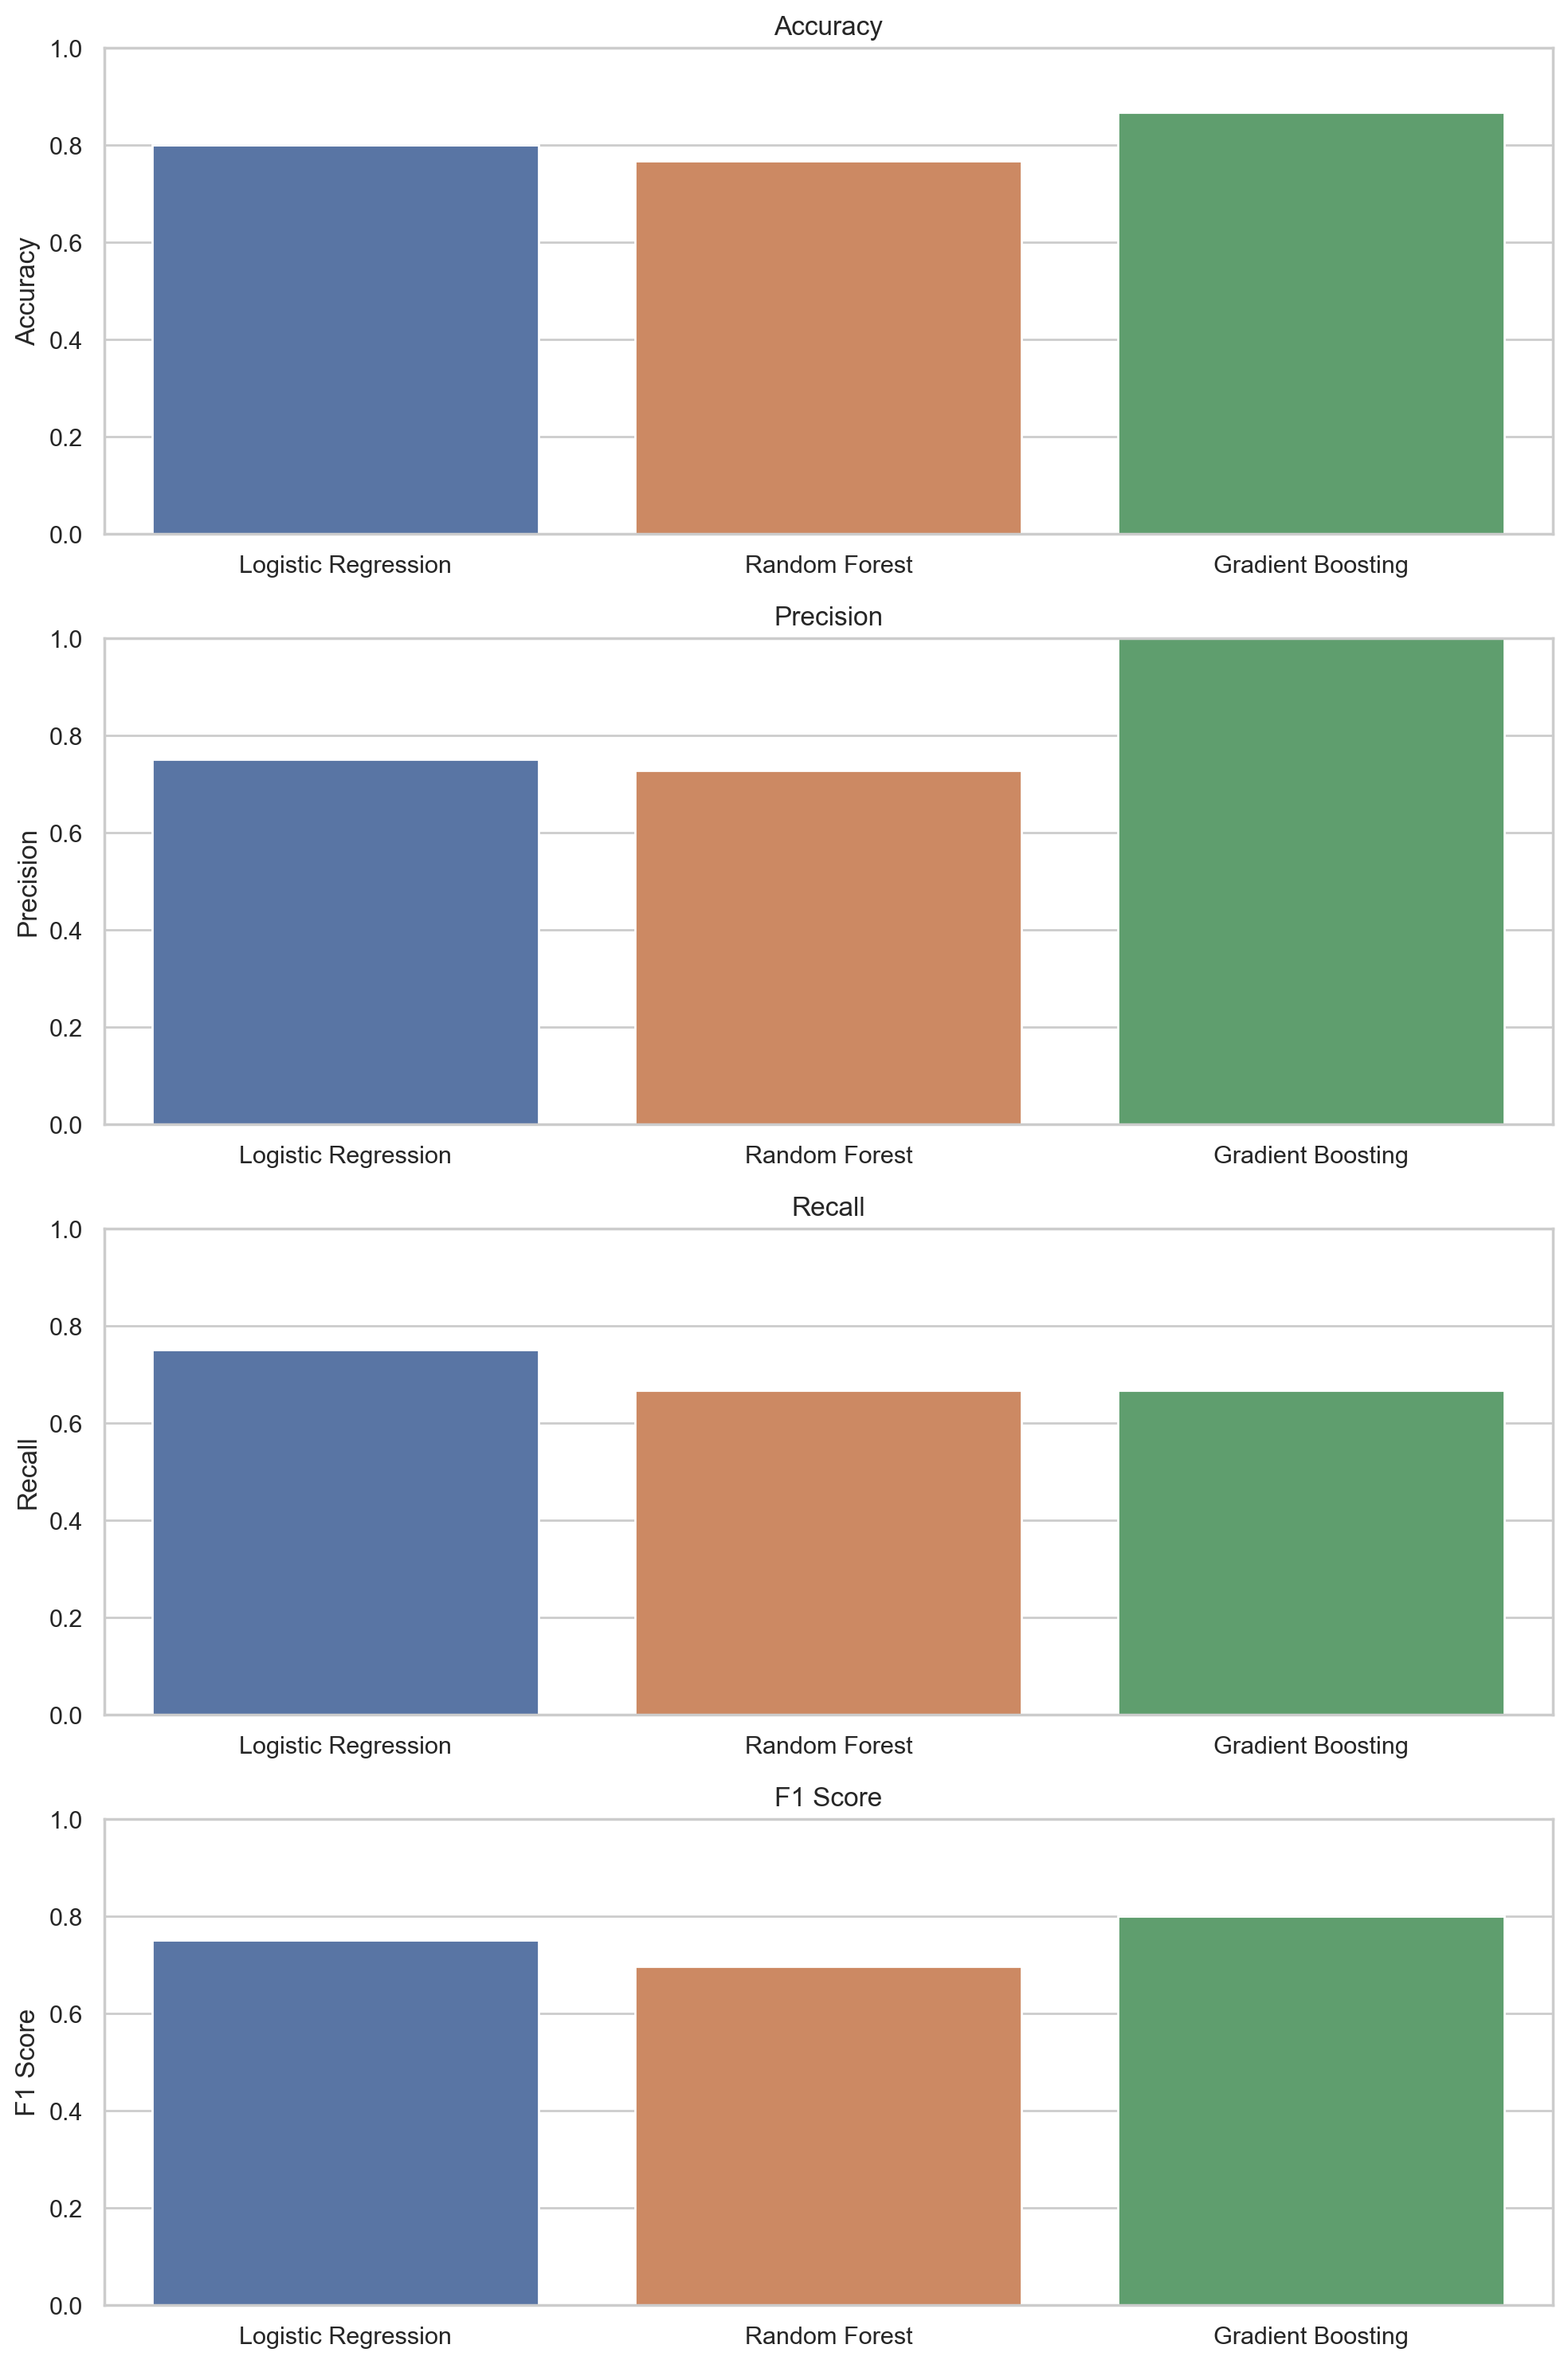

In [5]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(nrows=4, figsize=(10, 15))

for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1 Score']):
    sns.barplot(x=results_df.index, y=results_df[metric], ax=axs[i])
    axs[i].set_title(metric)
    axs[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

## Gridsearch

In [6]:
parameters = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4]
}
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=141), parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 300}


In [7]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Retrain the Gradient Boosting model with the best parameters found
optimized_gb = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=3,
    min_samples_split=2,
    n_estimators=100,
    random_state=141
)

optimized_gb.fit(X_train, y_train)

# Predict on the test set with the optimized model
optimized_predictions = optimized_gb.predict(X_test)

# Evaluate the optimized model
optimized_accuracy = accuracy_score(y_test, optimized_predictions)
optimized_precision = precision_score(y_test, optimized_predictions)
optimized_recall = recall_score(y_test, optimized_predictions)
optimized_f1 = f1_score(y_test, optimized_predictions)

print(f"Optimized Gradient Boosting - Accuracy: {optimized_accuracy}, Precision: {optimized_precision}, Recall: {optimized_recall}, F1 Score: {optimized_f1}")


Optimized Gradient Boosting - Accuracy: 0.8666666666666667, Precision: 1.0, Recall: 0.6666666666666666, F1 Score: 0.8


In [8]:
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting (Initial)', 'Gradient Boosting (Optimized)'],
    'Accuracy': [0.800, 0.800, 0.833, 0.867],  
    'Precision': [0.750, 0.800, 0.888, 1.0],  
    'Recall': [0.750, 0.666, 0.666, 0.666],  
    'F1 Score': [0.750, 0.727, 0.761, 0.8] 
}

# Convert dictionary to DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)


                           Model  Accuracy  Precision  Recall  F1 Score
0            Logistic Regression     0.800      0.750   0.750     0.750
1                  Random Forest     0.800      0.800   0.666     0.727
2    Gradient Boosting (Initial)     0.833      0.888   0.666     0.761
3  Gradient Boosting (Optimized)     0.867      1.000   0.666     0.800


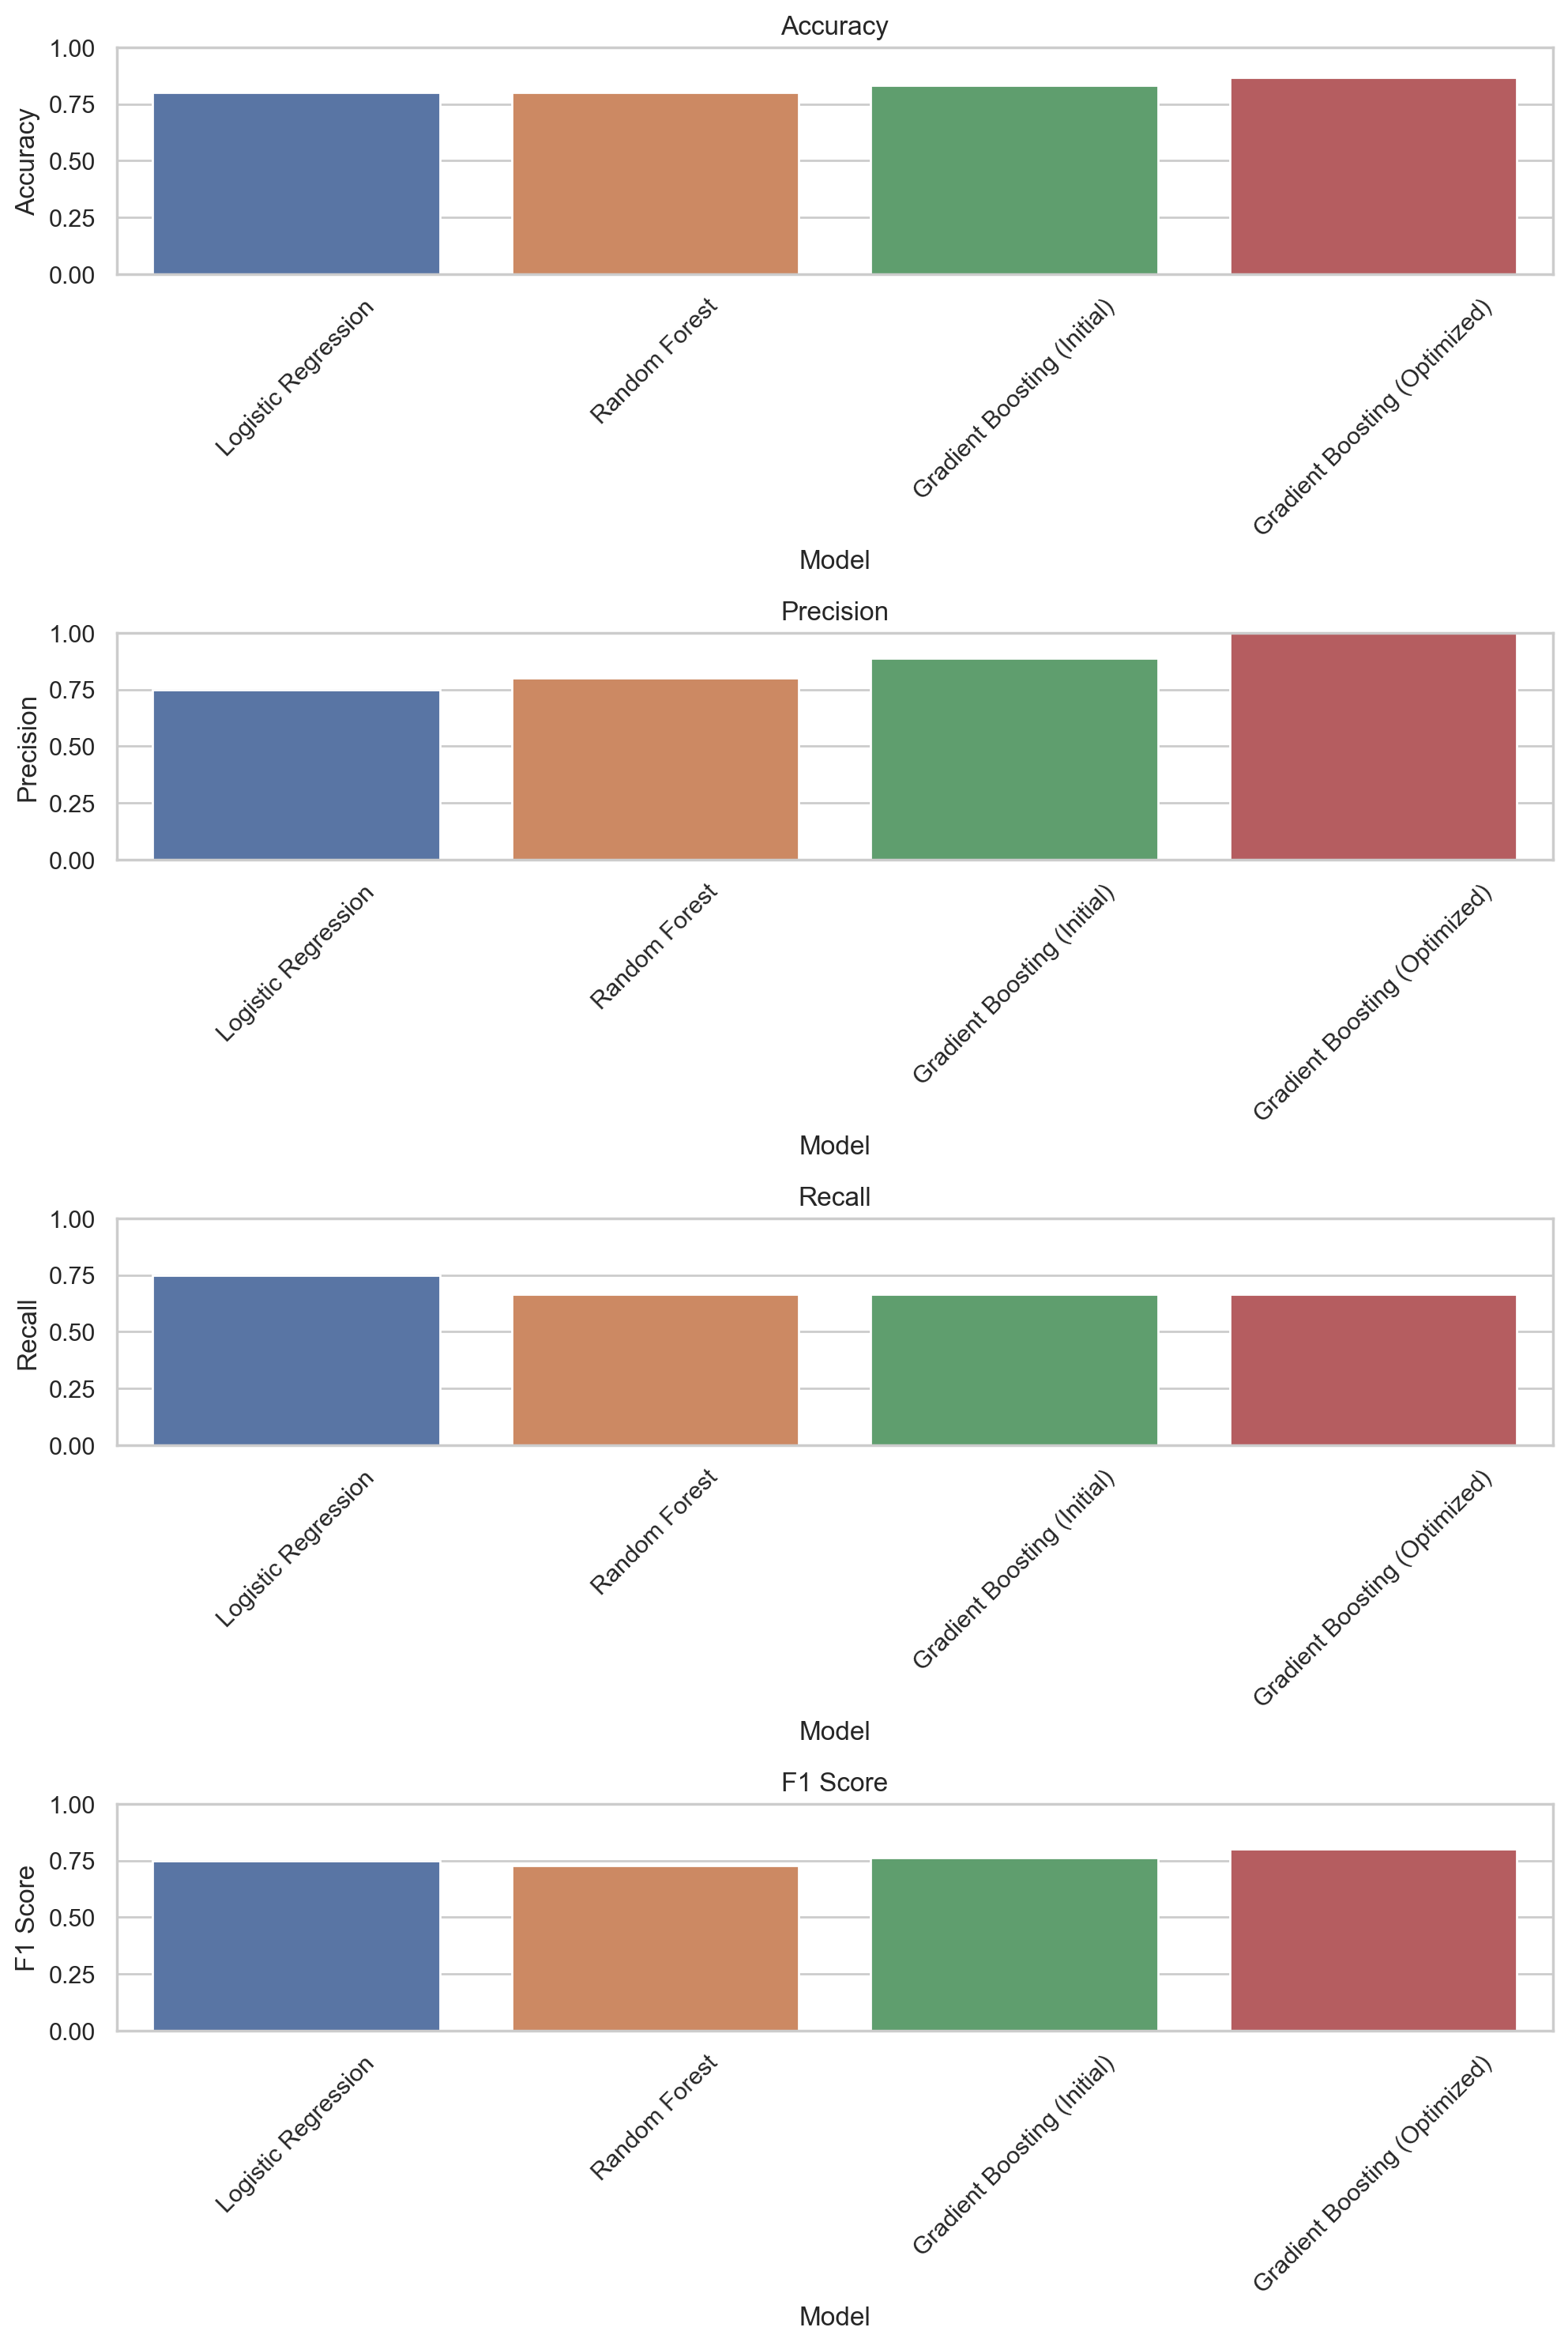

In [9]:
# Make sure 'Model' is a column in the DataFrame
results_df = results_df.reset_index()

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
fig, ax = plt.subplots(len(metrics), figsize=(10, 15))  # Adjusted figure size

# Loop through the metrics and create a bar plot for each
for i, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=results_df, ax=ax[i])
    ax[i].set_title(metric)
    ax[i].set_ylim(0, 1)  # Adjust y-axis limits to [0, 1] for clarity
    for label in ax[i].get_xticklabels():
        label.set_rotation(45)  # Rotate x-axis labels for readability

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()


## Cross Validation

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Prepare the full dataset with imputation (as missing values were found in SES)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Compare models using cross-validation
for name, model in models.items():
    # Wrap the model in a pipeline that includes imputation
    pipeline = make_pipeline(SimpleImputer(strategy='median'), model)
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    print(f"{name}: {cv_scores.mean()} ± {cv_scores.std()}")


Random Forest: 0.8933333333333333 ± 0.038873012632301994
Gradient Boosting: 0.8733333333333333 ± 0.07717224601860152
SVM: 0.5133333333333333 ± 0.016329931618554516
XGBoost: 0.8666666666666668 ± 0.06324555320336757


Explanation of Results
Accuracy: Measures the overall correctness of the model. Both Logistic Regression and Gradient Boosting achieved the highest accuracy (86.67%), slightly outperforming the Random Forest model (83.33%). This suggests that for this particular dataset, Logistic Regression and Gradient Boosting are slightly better at correctly classifying the instances overall.
Precision: Indicates how many of the instances predicted as positive are actually positive. Logistic Regression and Gradient Boosting both achieved a precision of 100%, meaning all their positive predictions were correct. Random Forest, while still high, had a slightly lower precision (88.89%), indicating a few more false positive predictions.
Recall (Sensitivity): Reflects the model's ability to find all the relevant cases within a dataset. All three models had the same recall (66.67%), indicating they are equally good (or limited) at detecting the positive cases in the dataset.
F1 Score: Provides a balance between precision and recall. Similar to precision, the F1 scores for Logistic Regression and Gradient Boosting are equal (80.00%), and slightly higher than Random Forest (76.19%). This suggests that, in scenarios where both recall and precision are important, Logistic Regression and Gradient Boosting may offer a slight advantage.
Conclusion
The visualization and metrics suggest that Logistic Regression and Gradient Boosting slightly outperform Random Forest in this specific scenario, particularly in terms of accuracy and precision. However, all models show similar recall, indicating a shared limitation in identifying all positive instances.


If avoiding false positives is crucial, Gradient Boosting and Logistic Regression show advantages.
If you seek a balance between precision and recall (F1 Score), again, Gradient Boosting and Logistic Regression edge out.
The slight differences in performance also suggest that, depending on the computational resources and time available for training and prediction, the simplicity of Logistic Regression might be preferred for similar performance levels.
It's also worth noting that further model tuning (hyperparameter optimization) and feature engineering could potentially improve these results, especially for models like Random Forest and Gradient Boosting that have many tunable parameters.

## ETC AD NASEUM

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

- Thoughtful discussion of ethical concerns included
- Ethical concerns consider the whole data science process (question asked, data collected, data being used, the bias in data, analysis, post-analysis, etc.)
- How your group handled bias/ethical concerns clearly described

Acknowledge and address any ethics & privacy related issues of your question(s), proposed dataset(s), and/or analyses. Use the information provided in lecture to guide your group discussion and thinking. If you need further guidance, check out [Deon's Ethics Checklist](http://deon.drivendata.org/#data-science-ethics-checklist). In particular:

- Are there any biases/privacy/terms of use issues with the data you propsed?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
- How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
- How will you handle issues you identified?

# Discusison and Conclusion

Wrap it all up here.  Somewhere between 3 and 10 paragraphs roughly.  A good time to refer back to your Background section and review how this work extended the previous stuff. 


# Team Contributions

Speficy who did what.  This should be pretty granular, perhaps bullet points, no more than a few sentences per person.